In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats.stats import pearsonr
from patsy import dmatrices

C:\Users\Chaitanya\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Reading of data
d = pd.read_csv('C:\\Users\\Chaitanya\\Google Drive\\SBU_After\\Coursework\\Data Science\\Assignments\\Assignment 2\\properties_2016.csv')

In [3]:
#Merging of train and properties data into output file

a = pd.read_csv("C:\\Users\\Chaitanya\\Google Drive\\SBU_After\\Coursework\\Data Science\\Assignments\\Assignment 2\\properties_2016.csv")
b = pd.read_csv("C:\\Users\\Chaitanya\\Google Drive\\SBU_After\\Coursework\\Data Science\\Assignments\\Assignment 2\\train_2016_v2.csv")
b = b.dropna(axis=1)
merged = a.merge(b, on='parcelid')

merged.to_csv("C:\\Users\\Chaitanya\\Google Drive\\SBU_After\\Coursework\\Data Science\\Assignments\\Assignment 2\\data.csv", index=False)

In [2]:
# After merging the data, it's important to store the data in a data frame.

data = pd.read_csv('C:\\Users\\Chaitanya\\Google Drive\\SBU_After\\Coursework\\Data Science\\Assignments\\Assignment 2\\data.csv')

In [7]:
#Pearson coefficient of the complete dataset
corr = data.corr()
corr

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
parcelid,1.000000,0.588425,-0.047806,0.294147,-0.014073,0.004971,NaN,0.121008,-0.002608,NaN,...,0.167936,0.029649,0.008256,0.003825,NaN,0.000997,-0.030727,0.033895,0.676362,0.004837
airconditioningtypeid,0.588425,1.000000,-0.154656,NaN,-0.037479,0.075327,NaN,0.008108,-0.034114,NaN,...,-0.074898,0.234819,-0.047171,-0.001102,NaN,0.027169,-0.028218,0.076337,0.797531,0.005179
architecturalstyletypeid,-0.047806,-0.154656,1.000000,NaN,-0.003398,0.071646,NaN,NaN,-0.003398,NaN,...,0.009546,-0.086010,-0.047364,0.028603,NaN,0.050978,0.020860,NaN,-0.063332,-0.004276
basementsqft,0.294147,NaN,NaN,1.000000,0.392206,0.554301,NaN,NaN,0.394347,NaN,...,0.610367,0.437536,0.549054,0.372581,NaN,0.123864,0.406130,NaN,0.142869,0.253395
bathroomcnt,-0.014073,-0.037479,-0.003398,0.392206,1.000000,0.646120,NaN,-0.259748,1.000000,NaN,...,0.322059,0.320834,0.586431,0.476363,NaN,0.353807,0.461892,0.046710,0.013078,0.027889
bedroomcnt,0.004971,0.075327,0.071646,0.554301,0.646120,1.000000,NaN,-0.025736,0.618060,NaN,...,0.002461,0.150591,0.308424,0.241335,NaN,0.173211,0.239062,0.023705,0.028170,0.025467
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,0.121008,0.008108,NaN,NaN,-0.259748,-0.025736,NaN,1.000000,-0.259258,NaN,...,-0.422753,0.388514,-0.105266,-0.046708,NaN,-0.011348,-0.042012,-0.007968,-0.044472,-0.009573
calculatedbathnbr,-0.002608,-0.034114,-0.003398,0.394347,1.000000,0.618060,NaN,-0.259258,1.000000,NaN,...,0.369089,0.369760,0.610961,0.497764,NaN,0.371635,0.487313,0.046273,0.031270,0.029448
decktypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#First pearson correlation
size = data.taxamount
count = data.landtaxvaluedollarcnt

np.corrcoef(x=size, y=count)

array([[ 1.       ,  0.9027091],
       [ 0.9027091,  1.       ]])

In [16]:
#Second pearson correlation
size = data.taxamount
count = data.structuretaxvaluedollarcnt

np.corrcoef(x=size, y=count)

array([[ 1.        ,  0.79081989],
       [ 0.79081989,  1.        ]])

In [18]:
#Third pearson correlation
size = data.taxamount
count = data.logerror

np.corrcoef(x=size, y=count)

array([[ 1.        , -0.00667024],
       [-0.00667024,  1.        ]])

In [5]:
#Forth pearson correlation
size = data.rawcensustractandblock
count = data.regionidneighborhood

np.corrcoef(x=size, y=count)

array([[  1.,  nan],
       [ nan,  nan]])

In [6]:
data.rawcensustractandblock.fillna(0, inplace=True)
data.regionidneighborhood.fillna(0, inplace=True)

In [7]:
#Forth pearson correlation with cleaned columns
size = data.rawcensustractandblock
count = data.regionidneighborhood

np.corrcoef(x=size, y=count)

array([[ 1.        , -0.13600747],
       [-0.13600747,  1.        ]])

In [8]:
data_clean = data[['rawcensustractandblock','regionidneighborhood','logerror','bathroomcnt','regionidneighborhood']].dropna()

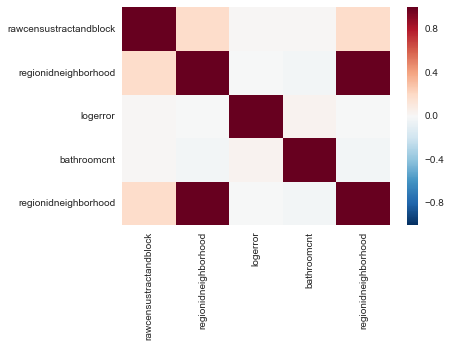

In [9]:
#Heat Map
%matplotlib inline

sns.heatmap(data_clean.corr())
size = plt.gcf()
#size.set_size_inches(12,8)
plt.show()
#The darker the region, better is the correlation.
#Please ignore the diagonal portions. As the same variable is correlating with each other. Hence, it will always be dark.

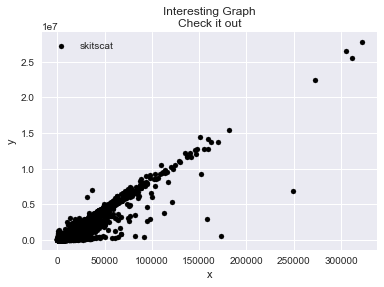

In [58]:
#First Scatter plot
x = data.taxamount
y = data.taxvaluedollarcnt

plt.scatter(x,y, label='skitscat', color='k', s=25, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

#Interesting properties:
#1. The graph is linear in nature; and hence, it can be said that 'taxamount' and 'taxvaluedollarcnt' are positively correlated to each other.
#2. For more than 95% of the points; With increase in 'taxamount', there is substantial amount of increase in 'taxvaluedollarcnt'.
#3. However, there are few outliers in the plot. For instance, one of the points has very less 'taxamount', but very high 'taxvaluedollarcnt'.

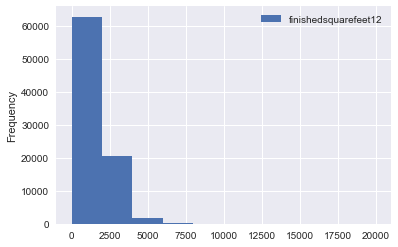

In [59]:
#Second Histogram
%matplotlib inline
y = data.taxamount
x = np.random.normal(size = 1000)
data.plot( x='structuretaxvaluedollarcnt', y='finishedsquarefeet12', kind='hist')

#Interesting properties:
#1. The major chunk of the 'structuretaxvaluedollarcnt' has value ranging from '0-2500' 'finishedsquarefeet'.
#2. For about 5%-10% of the structuretaxvaluedollarcnt has value ranging from '5000-8000' 'finishedsquarefeet'.
#3. The plot signifies the many houses rates increase as the houses are in their completion (building) stage.

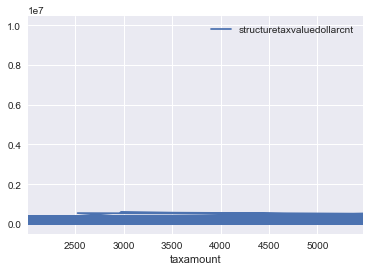

In [69]:
#Third line chart
data.plot(x='taxamount', y='structuretaxvaluedollarcnt')
fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(18.5, 10.5)
plt.show()
#because their is no relation between the two variables, the line graph is not symmetric 

#Interesting properties: 
#1. The plot is not as I was expecting.
#2. Most of the data is focused in between the (0.0 - 0.1)*10^7 'structuretaxvaluedollarcnt'. And, I was expecting it to be more scattered across various points.
#3. Even though the 'taxamount' is increasing (more or less linearly), the change of value in y-axis is very less.
#4. Hence, we can expect that the 'taxamount' may varry, irrespective of the variation in 'structuretaxvaluedollarcnt'.

C:\Users\Chaitanya\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))


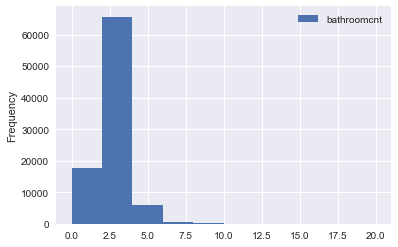

In [5]:
#Forth line chart
data.plot(x='fullbathcnt', y='bathroomcnt')
#Second Histogram
%matplotlib inline
y = data.taxamount
x = np.random.normal(size = 1000)
data.plot(x='fullbathcnt', y='bathroomcnt', kind='hist')

#Interesting properties:
#1. The plot is quite similar to the one I expected.
#2. The major chunk of the 'bathroomcnt' has value ranging from '0-3' count.
#3. For about 5%-10% of the 'bathroomcnt' has value ranging from '4-10' count.

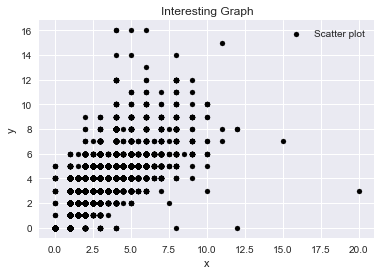

In [7]:
#Fifth Scatter plot
x = data.bathroomcnt
y = data.bedroomcnt

plt.scatter(x,y, label='Scatter plot', color='k', s=25, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph')
plt.legend()
plt.show()

#Interesting properties:
#1. The graph is kind of linear in nature; and hence, it can be said that 'bathroomcnt' and 'bedroomcnt' are positively correlated to each other.
#2. For more than 90% of the points; With increase in 'bathroomcnt', there is substantial amount of increase in 'bedroomcnt'.
#3. The majority of the chunk of data is concentrated within 0-10 'bathroomcnt' and 0-11 'bedroomcnt'.
#3. However, there are few outliers in the plot. For instance, one of the points has very less 'taxamount', but very high 'taxvaluedollarcnt'.

In [19]:
#First Linear regression 
lm = smf.ols(formula = 'logerror ~ basementsqft', data = data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     2.813
Date:                Fri, 22 Sep 2017   Prob (F-statistic):              0.101
Time:                        11:08:42   Log-Likelihood:                 16.089
No. Observations:                  43   AIC:                            -28.18
Df Residuals:                      41   BIC:                            -24.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0091      0.050     -0.181   

In [20]:
#Second Linear regression

lm = smf.ols(formula = 'logerror ~ numberofstories + basementsqft', data = data).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.678
Date:                Fri, 22 Sep 2017   Prob (F-statistic):              0.200
Time:                        11:11:30   Log-Likelihood:                 16.394
No. Observations:                  43   AIC:                            -26.79
Df Residuals:                      40   BIC:                            -21.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0491      0.073     

In [ ]:
#Linear Reqression Analysis:
#I analyzed the relation of logerror with respect to all the other variables. And, then concluded to plot two linear reqression plots.
#First, with 'basementsqft' and second with the combination of ('basementsqft' + 'numberofstories').
#After creating both the linear regression. I see that the value of Adj. mean square has decreased, in the second case.
#Hence, the best linear regression value is predicted only with the variable 'basementsqft'.

In [23]:
#Another way to display linear regression results
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
import pylab as pl

seaborn.set()

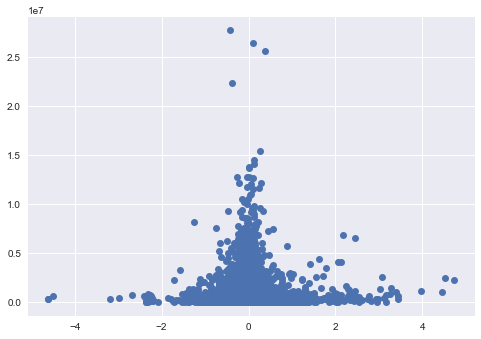

In [36]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = data.logerror
y = data.taxvaluedollarcnt

plt.plot(X.squeeze(), y, 'o');

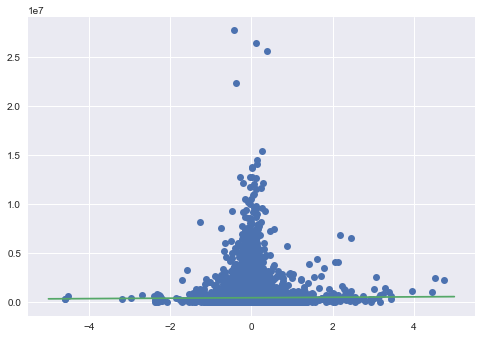

In [43]:
model = LinearRegression()
model.fit(X.values.reshape(-1,1), y)


# Plot the data and the model prediction
X_fit = np.linspace(-5, 5, 5)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y.squeeze(), 'o')
plt.plot(X_fit.squeeze(), y_fit);

In [45]:
#K-nearest neighbour model
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn for plotting defaults
import seaborn as sns; sns.set()
X = data.logerror
Y = data.taxvaluedollarcnt

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X.values.reshape(-1,1), Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [50]:
#Predict the accuracy
y_pred = knn.predict(X.values.reshape(-1,1))

In [51]:
#Check the prediction
print("{0} / {1} correct".format(np.sum(y == y_pred), len(y)))

1901 / 90275 correct


In [24]:
data_tree = data[['taxvaluedollarcnt','logerror']].dropna()
data_tree = data_tree[['logerror','taxvaluedollarcnt']].apply(pd.to_numeric)
data_tree

,logerror,taxvaluedollarcnt
0,0.0953,191811.0
1,0.0198,239679.0
2,0.0060,47853.0
3,-0.0566,62914.0
4,0.0573,554000.0
5,0.0564,289609.0
6,0.0315,526000.0
7,0.0257,571086.0
8,0.0020,462594.0
9,-0.0576,268502.0


In [27]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#df[['logerror','taxvaluedollarcnt']] = data[['logerror','taxvaluedollarcnt']].apply(pd.to_numeric)
#X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

X, y = data_tree.logerror.values.reshape(-1,1), data_tree.taxvaluedollarcnt.values.ravel()

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

print(regr.feature_importances_)
#This model doesn't work well, because I had to convert the values into Integer. And, then it doesn't make sense to really compute any analysis on this data.
#However, it's nice to learn the way, Random Forest works.

[ 1.]


In [ ]:
The model which I liked the most is Linear Regression. Because of it gave better prediction in comparision to other two models.

Basic description of how Linear regression works:
1.It's designed for more statistically-oriented approaches to data analysis, with an emphasis on econometric analyses.
2. It integrates well with the pandas and numpy libraries.
3. It also has built in support for many of the statistical tests to check the quality of the fit and a dedicated set of plotting functions to visualize and diagnose the fit.
4. The best part is that, we use multiple packages to design a linear regression model.

Evaluation of how it works:
1. In more technical way, we are able to predict whether the quantities on x-axis and y-axis are positivelyly or negatively correlated.
2. If the slope of the plot is positive. Then, we can say that the variables are positively correlated. And vice-versa.
3. Statistically speaking, more the value of R-square, and it's respective Adjusted R-square; better is the correlation between these variables.
4. Moreover, I tried using two different libraries for plotting the linear regression model. First library is statsmodel.formula.api
   and the second library is sklearn.linear_model. In both the models, the accuracy was more or less the same.
    
Mathematical principles behind Linear Regression model:
1. The model forms a best fit line, considering all the data points.
2. The procedure for plotting the best fit line is as follows:
    - Initially few random points are considered.
    - The perpendicular distance from the data point to the line is calculated.
    - Similar process is repeated for all the points.
    - And we know, that we can draw infinite number of lines in a plane.
    - Hence, the line which is closed to all the points, is known as best fit line.
    - Visually, the line which has minimum perpendicular distance from all the points, is the best fit line.
3. Formular wise:  SSE=∑ni=1(xi−xi^)2
    - We calculate the sum of squares of the perpendicular distance from the data point to the line.
    - After comparing between all the lines, the line with least sum of square of error is considered as the best fit line.

Interesting experiences or surprises:
1. When I performed two Linear regression models. One between, 'basementsqft' => First; while another between 'logerror' and 'numberofstories + basementsqft' => Second. 
2. Considering, the Adjusted R-square value of 'First' plot as X and mean-square value as Y. And Adjusted R-square value of 'First' plot as A and mean-square value as B.
3. I see that, the X>A. However, Y<B.
4. Considering the above situation. I think that the model is overfitting 'Second' time.
5. Also, practically speaking I don't see any true relation in the 'Second'.




In [ ]:
#Tried to come up with a brute force logic

In [9]:
#Submission file creation
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

train = data
ss = pd.read_csv('C:\\Users\\Chaitanya\\Google Drive\\SBU_After\\Coursework\\Data Science\\Assignments\\Assignment 2\\sample_submission.csv')

backup = ss.copy()

In [12]:
start_val = -0.02
step = 0.0001
iters = 400

# Month-specific brute force
train['month'] = train.transactiondate.apply(lambda x: int(x.split('-')[1]))
#mu_vals
val = np.array([start_val + step*i for i in range(iters)])
#mu_buf
buffer = np.zeros(3)

for m_i, m in enumerate(range(10, 13)):
    
    errs = np.empty(len(val))
    
    for i, mu in enumerate(val):
        
        ans = [mu] * len(train[train['month'] >= m]['logerror'].values)
        errs[i] = mean_absolute_error(train[train['month'] >= m]['logerror'].values, ans)
    
    buffer[m_i] = val[np.argmin(errs)]
print('mu = ' + str(buffer))

backup['201610'] = buffer[0]
backup['201611'] = buffer[1]
backup['201612'] = buffer[2]

backup['201710'] = buffer[2]
backup['201711'] = buffer[2]
backup['201712'] = buffer[2]

backup.to_csv('C:\\Users\\Chaitanya\\Google Drive\\SBU_After\\Coursework\\Data Science\\Assignments\\Assignment 2\\submit_Kaggle.csv', index=False, float_format=('%.' + str(n) + 'f'))


mu = [ 0.0109  0.0109  0.01  ]


In [ ]:
#Nice to see my Kaggle ranking is 2664. However, I know I need to work more to get into the top 1000, which is my next target.